In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#创建列
s = pd.Series([1,3,6,np.nan,44,1])  #np.nan代表non
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


In [3]:
#创建日期序列 
#pd.date_range(起始日期, 终止日期, periods=None, freq=’D’, tz=None, normalize=False, name=None, closed=None)
#freq D H M 若为Y和M则返回本年最后一天或本月最后一天
#tz时区Asia Hong_Kong
#normalize 若为true则start和end被转化为0点
#name 时间索引的名称
#closed指start和end的区间范围 left左闭右开 right左开右闭 none闭区间
d = pd.date_range("20190101","20190227",periods=None,freq="D")
print(d)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

In [4]:
#字典传入创建二维表格
dfs = pd.DataFrame({"A":1,
                    "B":pd.Timestamp("20190430"),
                    "C":pd.Series(1,index=list(range(4)),dtype="float32"),
                    "D":np.array([3]*4,dtype="int32"),
                   "E":pd.Categorical(["test","train","test","train"]),
                   "F":"foo"},index=pd.date_range("20190101",periods=4))
print(dfs)

            A          B   C  D      E    F
2019-01-01  1 2019-04-30 NaN  3   test  foo
2019-01-02  1 2019-04-30 NaN  3  train  foo
2019-01-03  1 2019-04-30 NaN  3   test  foo
2019-01-04  1 2019-04-30 NaN  3  train  foo


In [5]:
#创建二维表格
dates = pd.date_range("20190101",periods=6)
df = pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=["A","B","C","D"])
print(df)

             A   B   C   D
2019-01-01   0   1   2   3
2019-01-02   4   5   6   7
2019-01-03   8   9  10  11
2019-01-04  12  13  14  15
2019-01-05  16  17  18  19
2019-01-06  20  21  22  23


In [6]:
#添加新列 index应保持一致
df["E"] = pd.Series([1,2,3,4,5,6],index=pd.date_range("20190101",periods=6))
print(df)

             A   B   C   D  E
2019-01-01   0   1   2   3  1
2019-01-02   4   5   6   7  2
2019-01-03   8   9  10  11  3
2019-01-04  12  13  14  15  4
2019-01-05  16  17  18  19  5
2019-01-06  20  21  22  23  6


In [7]:
#显示某列
#loc-select by label ,iloc-select by position
print("A列：",df["A"])
#显示某几行
print("1-4行：",df[0:3])
#根据标签显示某行某列
print("0102的DE列:",df.loc["20190102",["D","E"]])
#根据位置显示某行某列
print("第四行第四列:",df.iloc[3,3])

A列： 2019-01-01     0
2019-01-02     4
2019-01-03     8
2019-01-04    12
2019-01-05    16
2019-01-06    20
Freq: D, Name: A, dtype: int32
1-4行：             A  B   C   D  E
2019-01-01  0  1   2   3  1
2019-01-02  4  5   6   7  2
2019-01-03  8  9  10  11  3
0102的DE列: D    7
E    2
Name: 2019-01-02 00:00:00, dtype: int64
第四行第四列: 15


In [8]:
#筛选值
print(df[df.A>8])

             A   B   C   D  E
2019-01-04  12  13  14  15  4
2019-01-05  16  17  18  19  5
2019-01-06  20  21  22  23  6


In [9]:
#改变值
df.iloc[2,2] = 1111
print(df)

             A   B     C   D  E
2019-01-01   0   1     2   3  1
2019-01-02   4   5     6   7  2
2019-01-03   8   9  1111  11  3
2019-01-04  12  13    14  15  4
2019-01-05  16  17    18  19  5
2019-01-06  20  21    22  23  6


In [10]:
#数据平滑
dfcopy=df.copy()
dfcopy.A[dfcopy.A>4] = 4 #仅平滑该值
print(dfcopy)
dfcopy[dfcopy.A>3] = 100 #平滑该值所在的行
print(dfcopy)

            A   B     C   D  E
2019-01-01  0   1     2   3  1
2019-01-02  4   5     6   7  2
2019-01-03  4   9  1111  11  3
2019-01-04  4  13    14  15  4
2019-01-05  4  17    18  19  5
2019-01-06  4  21    22  23  6
              A    B    C    D    E
2019-01-01    0    1    2    3    1
2019-01-02  100  100  100  100  100
2019-01-03  100  100  100  100  100
2019-01-04  100  100  100  100  100
2019-01-05  100  100  100  100  100
2019-01-06  100  100  100  100  100


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#丢掉缺失值
df.iloc[2,2]=np.nan
print(df)
df = df.dropna(axis=1,how="any")
# axis 0表示丢掉行 1表示丢掉列
# how里面any表示只要有就丢掉该行 all表示全部是nan才丢掉该行
print(df)

             A   B     C   D  E
2019-01-01   0   1   2.0   3  1
2019-01-02   4   5   6.0   7  2
2019-01-03   8   9   NaN  11  3
2019-01-04  12  13  14.0  15  4
2019-01-05  16  17  18.0  19  5
2019-01-06  20  21  22.0  23  6
             A   B   D  E
2019-01-01   0   1   3  1
2019-01-02   4   5   7  2
2019-01-03   8   9  11  3
2019-01-04  12  13  15  4
2019-01-05  16  17  19  5
2019-01-06  20  21  23  6


In [12]:
#填充缺失值
df.iloc[2,2]=np.nan
print(df)
df = df.fillna(value=2019)
print(df)

             A   B     D  E
2019-01-01   0   1   3.0  1
2019-01-02   4   5   7.0  2
2019-01-03   8   9   NaN  3
2019-01-04  12  13  15.0  4
2019-01-05  16  17  19.0  5
2019-01-06  20  21  23.0  6
             A   B       D  E
2019-01-01   0   1     3.0  1
2019-01-02   4   5     7.0  2
2019-01-03   8   9  2019.0  3
2019-01-04  12  13    15.0  4
2019-01-05  16  17    19.0  5
2019-01-06  20  21    23.0  6


In [13]:
#检查是否存在缺失值 结果以True和False给出
df.iloc[2,2]=np.nan
print(df)
print(df.isnull())

             A   B     D  E
2019-01-01   0   1   3.0  1
2019-01-02   4   5   7.0  2
2019-01-03   8   9   NaN  3
2019-01-04  12  13  15.0  4
2019-01-05  16  17  19.0  5
2019-01-06  20  21  23.0  6
                A      B      D      E
2019-01-01  False  False  False  False
2019-01-02  False  False  False  False
2019-01-03  False  False   True  False
2019-01-04  False  False  False  False
2019-01-05  False  False  False  False
2019-01-06  False  False  False  False


0   -0.475712
1   -1.233039
2   -0.149504
3    1.159520
4    0.351145
5   -0.584057
dtype: float64


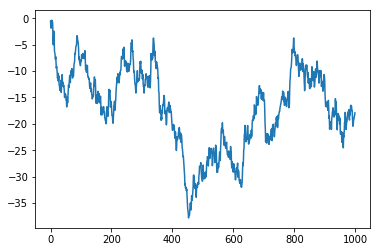

In [14]:
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
datas = data.cumsum()
print(data.head(6))
datas.plot()
plt.show()

          A         B         C         D
0  1.233364  0.113067  0.444545 -1.625460
1 -1.608245 -0.767923 -1.447006  1.127307
2 -0.679909  0.452427 -0.541347 -0.890027
3  1.530606  0.175930  0.640663  1.265277
4  0.716897 -1.159181 -0.869065 -0.038671
5  0.299281  0.414143  1.601342  0.567191


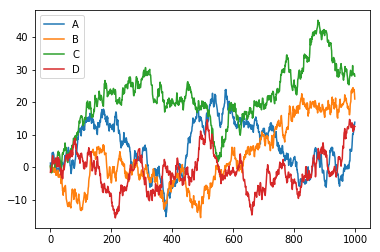

In [15]:
data =pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list("ABCD"))
datas = data.cumsum()
print(data.head(6))
datas.plot()
plt.show()